In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.patches as mpatches

In [2]:
# Define the encodings to try
encodings = ['utf-8', 'latin-1', 'cp1252']

# Try opening the file with different encodings
for encoding in encodings:
    try:
        with open('rss_4475_setiembre.txt', 'r', encoding=encoding) as file:
            xml_data = file.read()
        break
    except UnicodeDecodeError:
        continue
else:
    raise ValueError("Unable to decode the file with the specified encodings.")


# Parse the XML data
root = ET.fromstring(xml_data)

# Extract item elements
items = root.findall('.//item')

# Define column names for the table
columns = ['title', 'description', 'pubDate', 'link']

# Initialize an empty list to store the data
data = []

# Iterate over each item and extract the required data
for item in items:
    title = item.find('title').text
    description = item.find('description').text
    pub_date = item.find('pubDate').text
    link = item.find('link').text
    
    # Append the data as a row to the list
    data.append([title, description, pub_date, link])

pd.set_option('display.max_colwidth', None)
    
# Create a DataFrame from the data list and column names
df = pd.DataFrame(data, columns=columns)

In [3]:
df.head()

,title,description,pubDate,link
0,Concurso de Precios 9/2023 - Universidad de la República | Facultad de Información y Comunicación,Adquisición de bidones de 20 litros de Agua Mineral sin gas.<br/>Publicado:&nbsp;13/09/2023 13:30hs,"Wed, 13 Sep 2023 13:30:07 -0300",http://www.comprasestatales.gub.uy/consultas/detalle/id/1064012
1,Licitación Abreviada 505/2023 - Ministerio de Defensa Nacional | Dirección Nacional de Sanidad de las Fuerzas Armadas,AGUA MINERAL EMBOTELLADA<br/> Recepción de ofertas hasta: 13/09/2023 10:00hs<br/>Publicado:&nbsp;11&sol;08&sol;2023 12:15hs&nbsp;|&nbsp;&Uacute;ltima Modificaci&oacute;n:&nbsp;13&sol;09&sol;2023 10:01hs,"Fri, 11 Aug 2023 12:15:05 -0300",http://www.comprasestatales.gub.uy/consultas/detalle/id/1058896
2,Concurso de Precios 8/2023 - Intendencia de Paysandú | Intendencia de Paysandú,"LACTEOS-QUESOS-AGUA MINERAL SIN GAS, JUGOS, ETC PARA LOS 8 CAIF, PERIODO OCTUBRE, NOVIEMBRE, DICIEMBRE 2023. \nAjustarse a lo solicitado en las Condiciones Particulares.<br/> Recepción de ofertas hasta: 12/09/2023 14:00hs<br/>Publicado:&nbsp;06&sol;09&sol;2023 16:20hs&nbsp;|&nbsp;&Uacute;ltima Modificaci&oacute;n:&nbsp;12&sol;09&sol;2023 14:01hs","Wed, 06 Sep 2023 16:20:05 -0300",http://www.comprasestatales.gub.uy/consultas/detalle/id/1072464
3,Licitación Abreviada 14/2023 - Banco de Seguros del Estado | Banco de Seguros del Estado,SUMINISTRO DE AGUA POTABLE EN BIDONES Y ARRENDAMIENTO DE DISPENSADORES DE CONEXIÓN A RED SANITARIA CON FILTRO PARA DIFERENTES EDIFICIOS DEL BANCO DE SEGUROS DEL ESTADO.<br/> Recepción de ofertas hasta: 11/09/2023 12:00hs<br/>Publicado:&nbsp;28&sol;08&sol;2023 11:05hs&nbsp;|&nbsp;&Uacute;ltima Modificaci&oacute;n:&nbsp;11&sol;09&sol;2023 12:01hs,"Mon, 28 Aug 2023 11:05:09 -0300",http://www.comprasestatales.gub.uy/consultas/detalle/id/1069317
4,Concurso de Precios 10/2023 - Ministerio del Interior | Dirección Nacional de Policia Cientifica,BIDONES DE AGUA 20 LITROS<br/> Recepción de ofertas hasta: 11/09/2023 10:00hs<br/>Publicado:&nbsp;06&sol;09&sol;2023 08:15hs&nbsp;|&nbsp;&Uacute;ltima Modificaci&oacute;n:&nbsp;11&sol;09&sol;2023 10:01hs,"Wed, 06 Sep 2023 08:15:06 -0300",http://www.comprasestatales.gub.uy/consultas/detalle/id/1067005


In [4]:
# Convert the 'pubDate' column to datetime data type
df['pubDate2'] = pd.to_datetime(df['pubDate'], format='%a, %d %b %Y %H:%M:%S %z')

# Set 'pubDate' column as the DataFrame's index
df.set_index('pubDate2', inplace=True)

# Convert index to datetime with timezone
df.index = pd.to_datetime(df.index, utc=True)

# Extract month from index
df["Month"] = df.index.month
df["Year"] = df.index.year

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3619118104.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)


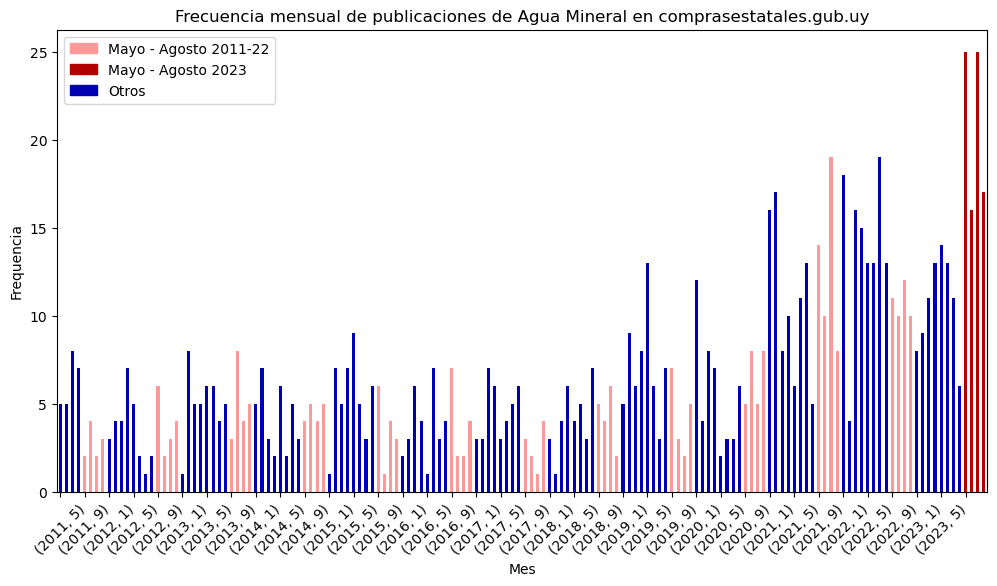

In [5]:
# Group by month and year and get frequencies
monthly_freq = df.groupby(["Year", "Month"]).size().drop((2023,9))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size if needed

# Define a function to determine the color of a month
def get_month_color(year, month):
    if (year == 2023 and month >= 5 and month <= 8):
        return (0.7, 0, 0)  # Dark Red (RGB)
    elif (year >= 2011 and year <= 2022 and month >= 5 and month <= 8):
        return (1, 0.6, 0.6)  # Light Red (RGB)
    else:
        return (0, 0, 0.7)  # Blue (RGB)

# Color mapping for legend
legend_colors = {
    (1, 0.6, 0.6): 'Mayo - Agosto 2011-22',
    (0.7, 0, 0): 'Mayo - Agosto 2023',
    (0, 0, 0.7): 'Otros'
}

# Define the patches for the legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in legend_colors.items()]

colors = [get_month_color(year, month) for (year, month), _ in monthly_freq.items()]

monthly_freq.plot(kind="bar", ax=ax, color=colors)

plt.xlabel("Mes")
plt.ylabel("Frequencia")
plt.title("Frecuencia mensual de publicaciones de Agua Mineral en comprasestatales.gub.uy")

# Custom x-axis labels formatter
tick_spacing = 4  # Display every 2nd label
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)

# Add the legend
plt.legend(handles=legend_patches)

plt.savefig('monthly_freq_plot.png')

plt.show()

In [6]:
df.columns

Index(['title', 'description', 'pubDate', 'link', 'Month', 'Year'], dtype='object')

In [7]:
# To get how many liters were bought

df3=pd.DataFrame()
for i, row in df.iterrows():
    url=row['link']
    mes=row['Month']
    anio=row['Year']
# Send a GET request to the website URL
#    url = "https://www.comprasestatales.gub.uy/consultas/detalle/id/1055209"  # Replace with the actual website URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all the div elements with class "desc-item" and iterate over them
    items = []
    for div in soup.find_all('div', class_='desc-item'):
        # Check if the span with class "cod-art" has the desired value
        cod_art = div.find('span', class_='cod-art').text.strip()
        if cod_art == "(Cód. Artículo 4475)":
            # Extract the item name and quantity
            name = div.h3.span.text.strip()
            cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()

            # Check if there is a table for characteristics
            table = div.find_next_sibling('table', class_='table features-table')
            if table:
                # Extract the characteristics from the table
                characteristics = {}
                for row in table.tbody.find_all('tr'):
                    key = row.td.text.strip()
                    value = row.td.find_next('strong').text.strip()
                    characteristics[key] = value

            # Append the extracted information to the list of items
            items.append({
                'Name': name,
                'Cantidad': cantidad,
                'Characteristics': characteristics if table else None,
                'Month': mes,
                'Year': anio
            })

    # Create a dataframe from the list of items
    df2 = pd.DataFrame(items)
    df3 = df3.append(df2)

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: Deprecatio

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3374053974.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  cantidad = div.find('li', text='Cantidad:').find_next('strong').text.strip()
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\337405

In [8]:
df3=df3.reset_index()
df3['Cantidad Number'] = None
df3['Cantidad Unit'] = None

for i, row in df3.iterrows():
    cantidad_text = row['Cantidad']

    # Extract the number and unit using regular expressions
    match = re.search(r'([\d,.]+)\s*([\w\s]+)', cantidad_text)
    if match:
        cantidad_number = match.group(1).replace('.', '').replace(',', '.')

        # Check if the number has a decimal point
        if '.' in cantidad_number or ',' in cantidad_number:
            cantidad_number = float(cantidad_number)
        else:
            cantidad_number = int(cantidad_number)

        cantidad_unit = match.group(2)

        # Update the corresponding row in df3
        df3.at[i, 'Cantidad Number'] = cantidad_number
        df3.at[i, 'Cantidad Unit'] = cantidad_unit

In [9]:
df3['Medida presentación'] = df3['Characteristics'].apply(lambda x: x['Medida presentación'] if isinstance(x, dict) and 'Medida presentación' in x else None)
df3['Medida Number'] = df3['Medida presentación'].apply(lambda x: re.findall(r'[\d/.]+', x)[0] if isinstance(x, str) else None)
df3['Medida Unit'] = df3['Medida presentación'].apply(lambda x: re.findall(r'[a-zA-Z]+', x)[0] if isinstance(x, str) else None)
df3['Medida Number'] = df3['Medida Number'].apply(lambda x: 0.5 if x=='1/2' else x)
df3['Total Litros'] = df3.apply(lambda row: float(row['Cantidad Number']) * float(row['Medida Number']) if row['Cantidad Number'] is not None and row['Medida Number'] is not None and isinstance(float(row['Cantidad Number']), (int, float)) and isinstance(float(row['Medida Number']), (int, float)) else None, axis=1)
df3['Total Litros'] = df3.apply(lambda row: row['Cantidad Number'] if row['Cantidad Unit']=='L' else row['Total Litros'], axis=1)

In [10]:
# Checking potential mistakes
df3[(df3['Cantidad Number']>17999) & (df3['Cantidad Unit']=='UNIDAD')  & ((df3['Medida Number']==str(2)) | (df3['Medida Number']==str(5)) |(df3['Medida Number']==str(20)))]

,index,Name,Cantidad,Characteristics,Month,Year,Cantidad Number,Cantidad Unit,Medida presentación,Medida Number,Medida Unit,Total Litros
1,0,Ítem Nº 1,"36.000,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'ENVASE', 'Medida presentación': '2 L'}",8,2023,36000.0,UNIDAD,2 L,2,L,72000.0
108,0,Ítem Nº 1,"23.040,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'ENVASE', 'Medida presentación': '20 L'}",5,2023,23040.0,UNIDAD,20 L,20,L,460800.0
903,0,Ítem Nº 3,"24.000,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'ENVASE', 'Medida presentación': '2 L'}",7,2017,24000.0,UNIDAD,2 L,2,L,48000.0
1148,0,Ítem Nº 1,"19.200,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'ENVASE', 'Medida presentación': '5 L'}",6,2013,19200.0,UNIDAD,5 L,5,L,96000.0
1177,0,Ítem Nº 1,"36.000,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'BIDON', 'Medida presentación': '20 L'}",3,2013,36000.0,UNIDAD,20 L,20,L,720000.0
1191,0,Ítem Nº 1,"65.000,00 UNIDAD","{'Tipo': 'SIN GAS', 'Presentación': 'BIDON', 'Medida presentación': '20 L'}",2,2013,65000.0,UNIDAD,20 L,20,L,1300000.0
1254,0,Ítem Nº 1,"84.200,00 UNIDAD","{'Tipo': 'CON GAS', 'Presentación': 'ENVASE', 'Medida presentación': '2 L'}",8,2011,84200.0,UNIDAD,2 L,2,L,168400.0


In [11]:
# Change some purchases for which there were mistakes.
df3.loc[1177, 'Total Litros'] = 36000.0
df3.loc[1191, 'Total Litros'] = 65000.0

C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3757504342.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_freq = df3.groupby(["Year", "Month"]).sum()['Total Litros'].drop((2023,9))
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3757504342.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)
C:\Users\guill\AppData\Local\Temp\ipykernel_29388\3757504342.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)


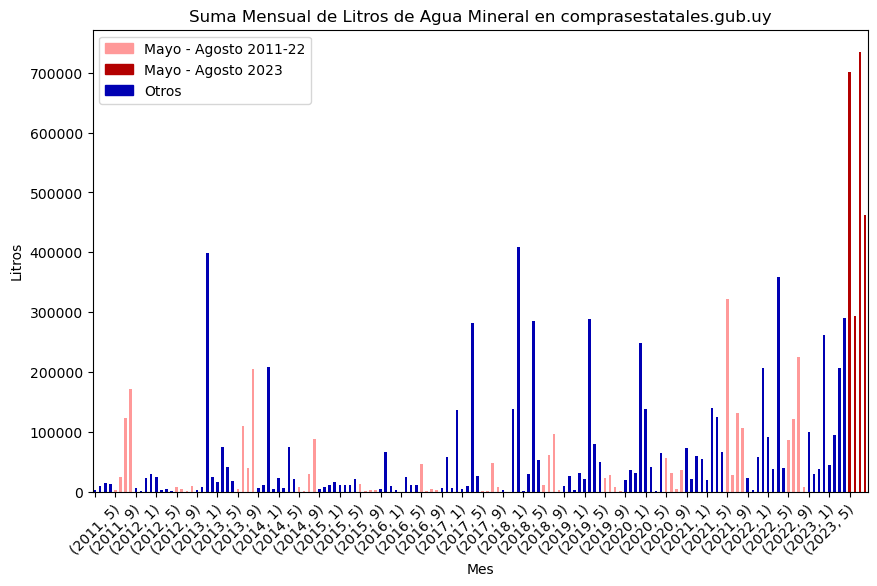

In [12]:
# Group by month and year and get frequencies
monthly_freq = df3.groupby(["Year", "Month"]).sum()['Total Litros'].drop((2023,9))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

# Custom x-axis labels formatter
tick_spacing = 4  # Display every 2nd label
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)



# Define a function to determine the color of a month
def get_month_color(year, month):
    if (year == 2023 and month >= 5 and month <= 8):
        return (0.7, 0, 0)  # Dark Red (RGB)
    elif (year >= 2011 and year <= 2022 and month >= 5 and month <= 8):
        return (1, 0.6, 0.6)  # Light Red (RGB)
    else:
        return (0, 0, 0.7)  # Blue (RGB)

# Color mapping for legend
legend_colors = {
    (1, 0.6, 0.6): 'Mayo - Agosto 2011-22',
    (0.7, 0, 0): 'Mayo - Agosto 2023',
    (0, 0, 0.7): 'Otros'
}

# Define the patches for the legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in legend_colors.items()]

colors = [get_month_color(year, month) for (year, month), _ in monthly_freq.items()]

monthly_freq.plot(kind="bar", ax=ax, color=colors)

plt.xlabel("Mes")
plt.ylabel("Litros")
plt.title('Suma Mensual de Litros de Agua Mineral en comprasestatales.gub.uy')

# Custom x-axis labels formatter
tick_spacing = 4  # Display every 2nd label
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(monthly_freq.index[::tick_spacing], rotation=45)

# Add the legend
plt.legend(handles=legend_patches)

plt.savefig('monthly_sum_plot.png')

plt.show()